In [1]:
library(Seurat)

Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang


In [2]:
library(dplyr)
library(patchwork)


Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [3]:
h5_data <- hdf5r::H5File$new('/data_volume/ifn_hbec/preprocess/filtered_feature_bc_matrix.h5', mode = 'r')

In [4]:
feature_matrix <- Matrix::sparseMatrix(
  i = h5_data[['matrix/indices']][],
  p = h5_data[['matrix/indptr']][],
  x = h5_data[['matrix/data']][],
  dimnames = list(
    h5_data[['matrix/features/name']][],
    h5_data[['matrix/barcodes']][]
  ),
  dims = h5_data[['matrix/shape']][],
  index1 = FALSE
)

In [ ]:
feature_matrix

In [6]:
h5_data

Class: H5File
Filename: /data_volume/ifn_hbec/preprocess/filtered_feature_bc_matrix.h5
Access type: H5F_ACC_RDONLY
Attributes: filetype, version, software_version, library_ids, original_gem_groups, pool
Listing:
   name  obj_type dataset.dims dataset.type_class
 matrix H5I_GROUP         <NA>               <NA>

In [7]:
matrix <- CreateSeuratObject(counts=feature_matrix,project = "HBEC", min.cells=3, min.features=200)

Warning message:
“Non-unique features (rownames) present in the input matrix, making unique”Warning message:
“Feature names cannot have underscores ('_'), replacing with dashes ('-')”

In [8]:
genes.use <- c('hash-1','hash-2','hash-3','hash-4','hash-5','hash-6','hash-7','hash-8','hash-9','hash-10','hash-11')

In [21]:
subset.matrix <- matrix[genes.use, drop=FALSE]

Warning message:
“The following arguments are not used: drop”

In [22]:
subset.matrix <- NormalizeData(subset.matrix, assay = "RNA", normalization.method = "CLR")

Normalizing across features


In [23]:
subset.matrix

An object of class Seurat 
11 features across 127198 samples within 1 assay 
Active assay: RNA (11 features, 0 variable features)

In [32]:
subset.matrix <- HTODemux(subset.matrix,assay = 'RNA' ,positive.quantile= 0.99)

Cutoff for hash-1 : 66 reads
Cutoff for hash-2 : 111 reads
Cutoff for hash-3 : 97 reads
Cutoff for hash-4 : 53 reads
Cutoff for hash-5 : 177 reads
Cutoff for hash-6 : 114 reads
Cutoff for hash-7 : 102 reads
Cutoff for hash-8 : 60 reads
Cutoff for hash-9 : 31 reads
Cutoff for hash-10 : 32 reads
Cutoff for hash-11 : 14 reads


In [33]:
table(subset.matrix$RNA_classification.global) #99


 Doublet Negative  Singlet 
   31171     8100    87927 

In [38]:
Idents(subset.matrix) <- "RNA_maxID"

Picking joint bandwidth of 0.0386
Picking joint bandwidth of 0.0533


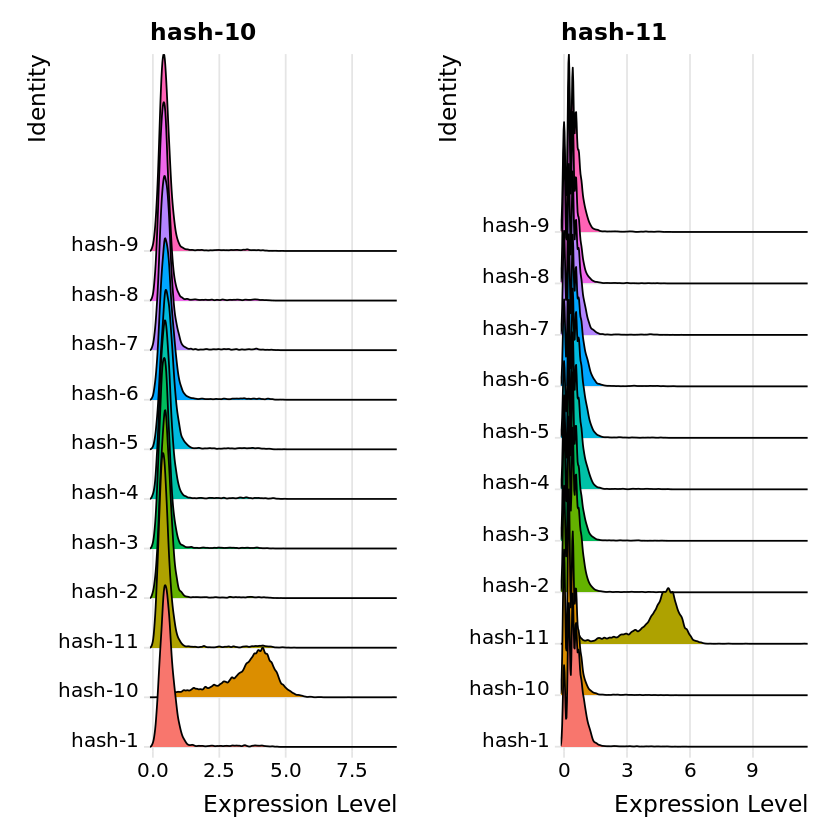

In [42]:
RidgePlot(subset.matrix, assay = "RNA", features = rownames(subset.matrix[["RNA"]])[10:11], ncol = 2)

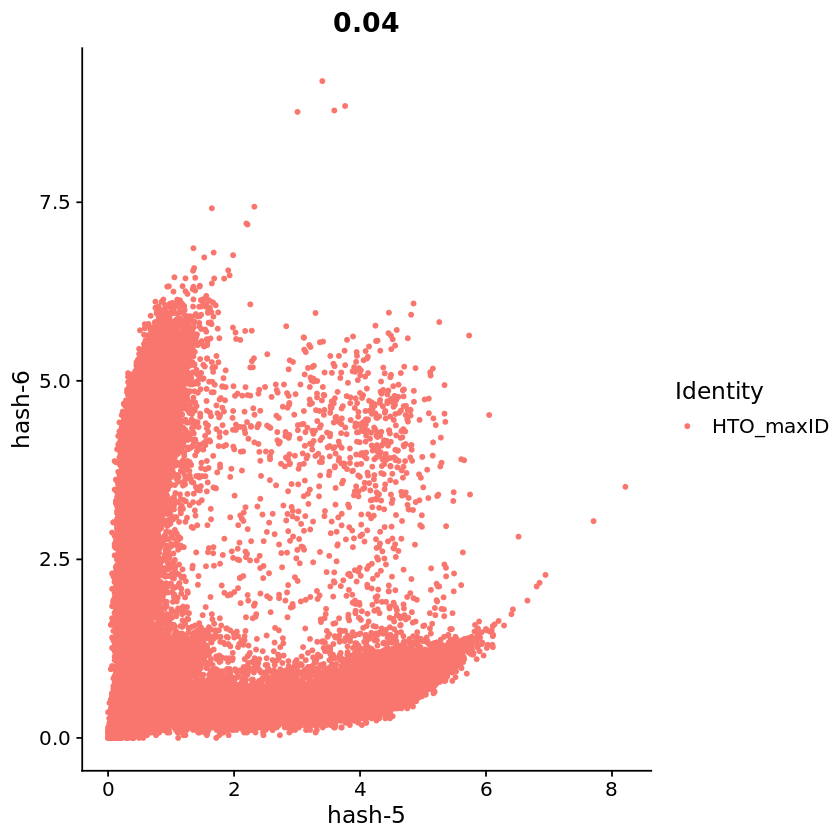

In [15]:
FeatureScatter(subset.matrix, feature1 = "hash-5", feature2 = "hash-6")


In [26]:
table(subset.matrix$RNA_classification.global)


 Doublet Negative  Singlet 
   26659    11618    88921 

In [31]:
HBEC.data

   [[ suppressing 32 column names ‘AAACCCAAGACATAAC-1’, ‘AAACCCAAGGAAGTAG-1’, ‘AAACCCAAGGGACTGT-1’ ... ]]
   [[ suppressing 32 column names ‘AAACCCAAGACATAAC-1’, ‘AAACCCAAGGAAGTAG-1’, ‘AAACCCAAGGGACTGT-1’ ... ]]
   [[ suppressing 32 column names ‘AAACCCAAGACATAAC-1’, ‘AAACCCAAGGAAGTAG-1’, ‘AAACCCAAGGGACTGT-1’ ... ]]
   [[ suppressing 33 column names ‘AAACCCAAGACATAAC-1’, ‘AAACCCAAGGAAGTAG-1’, ‘AAACCCAAGGGACTGT-1’ ... ]]


$`Gene Expression`
36601 x 123171 sparse Matrix of class "dgCMatrix"
                                                                                            
MIR1302-2HG   .  .  .  .  .  .  .  .  .  . .  .  .  .  .  .  .  .  .  .  .  .  .   . .  .  .
FAM138A       .  .  .  .  .  .  .  .  .  . .  .  .  .  .  .  .  .  .  .  .  .  .   . .  .  .
OR4F5         .  .  .  .  .  .  .  .  .  . .  .  .  .  .  .  .  .  .  .  .  .  .   . .  .  .
AL627309.1    .  .  .  .  .  .  .  .  .  . .  .  .  .  .  .  .  .  .  .  .  .  .   . .  .  .
AL627309.3    .  .  .  .  .  .  .  .  .  . .  .  .  .  .  .  .  .  .  .  .  .  .   . .  .  .
AL627309.2    .  .  .  .  .  .  .  .  .  . .  .  .  .  .  .  .  .  .  .  .  .  .   . .  .  .
AL627309.5    .  .  .  .  .  .  .  .  .  . .  .  .  .  .  .  .  .  .  .  .  .  .   . .  .  .
AL627309.4    .  .  .  .  .  .  .  .  .  . .  .  .  .  .  .  .  .  .  .  .  .  .   . .  .  .
AP006222.2    .  .  .  .  .  .  .  .  .  . .  .  .  .  .  .  .  .  .  .  .  .  .   . .  .  .
A

In [25]:
head(HBEC.data)

   [[ suppressing 32 column names ‘AAACCCAAGACATAAC-1’, ‘AAACCCAAGGAAGTAG-1’, ‘AAACCCAAGGGACTGT-1’ ... ]]
   [[ suppressing 32 column names ‘AAACCCAAGACATAAC-1’, ‘AAACCCAAGGAAGTAG-1’, ‘AAACCCAAGGGACTGT-1’ ... ]]
   [[ suppressing 32 column names ‘AAACCCAAGACATAAC-1’, ‘AAACCCAAGGAAGTAG-1’, ‘AAACCCAAGGGACTGT-1’ ... ]]
   [[ suppressing 33 column names ‘AAACCCAAGACATAAC-1’, ‘AAACCCAAGGAAGTAG-1’, ‘AAACCCAAGGGACTGT-1’ ... ]]


$`Gene Expression`
36601 x 123171 sparse Matrix of class "dgCMatrix"
                                                                                            
MIR1302-2HG   .  .  .  .  .  .  .  .  .  . .  .  .  .  .  .  .  .  .  .  .  .  .   . .  .  .
FAM138A       .  .  .  .  .  .  .  .  .  . .  .  .  .  .  .  .  .  .  .  .  .  .   . .  .  .
OR4F5         .  .  .  .  .  .  .  .  .  . .  .  .  .  .  .  .  .  .  .  .  .  .   . .  .  .
AL627309.1    .  .  .  .  .  .  .  .  .  . .  .  .  .  .  .  .  .  .  .  .  .  .   . .  .  .
AL627309.3    .  .  .  .  .  .  .  .  .  . .  .  .  .  .  .  .  .  .  .  .  .  .   . .  .  .
AL627309.2    .  .  .  .  .  .  .  .  .  . .  .  .  .  .  .  .  .  .  .  .  .  .   . .  .  .
AL627309.5    .  .  .  .  .  .  .  .  .  . .  .  .  .  .  .  .  .  .  .  .  .  .   . .  .  .
AL627309.4    .  .  .  .  .  .  .  .  .  . .  .  .  .  .  .  .  .  .  .  .  .  .   . .  .  .
AP006222.2    .  .  .  .  .  .  .  .  .  . .  .  .  .  .  .  .  .  .  .  .  .  .   . .  .  .
A

In [21]:
write.table(subset.matrix$RNA_classification,file='/data_volume/ifn_hbec/preprocess/HBEC_HTO_assignments.csv')